# 1. GIẢI NÉN DATASET VÀ LƯU DƯỚI DẠNG PICKLE

## 1.1 Giải nén

In [ ]:
import re
import numpy as np
import pickle
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn tới thư mục bạn muốn chuyển đến
path = '/content/drive/MyDrive/DACN3_Spell_VN/'

# Thực hiện việc chuyển đến thư mục
os.chdir(path)

Mounted at /content/drive


In [ ]:
!pip install rarfile
import rarfile
from tqdm import tqdm
import os

def extract_rar(file_path, extract_to):
    with rarfile.RarFile(file_path) as rf:
        for file in tqdm(rf.infolist(), desc='Extracting'):
            rf.extract(file, path=extract_to)

# Đường dẫn tới tệp tin rar bạn muốn giải nén
rar_file_test = 'data/Test_Full.rar'

# Đường dẫn tới tệp tin rar bạn muốn giải nén
rar_file_train = 'data/Train_Full.rar'

# Thư mục mà bạn muốn giải nén tệp tin rar đến
extract_to = 'data/'

In [ ]:
# Giải nén tệp tin rar
extract_rar(rar_file_test, extract_to)
# Giải nén tệp tin rar
extract_rar(rar_file_train, extract_to)

Extracting:  11%|█▏        | 5770/50384 [01:20<10:23, 71.51it/s]


KeyboardInterrupt: 

## 1.2 Lưu dataset đưới dạng pickle

In [ ]:
class FileData(object):
    def __init__(self, path):
        self.path = path
        with open(path, encoding='utf-16') as f:
          self.data = f.read()

In [ ]:
ABSOLUTE_PATH = "Data/Train_Full"

In [ ]:
c_tri =  "/Chinh tri Xa hoi"

d_song = "/Doi song"

khoa_hoc = "/Khoa hoc"

kinh_doanh = "/Kinh doanh"

p_luat = "/Phap luat"

suc_khoe = "/Suc khoe"

the_gioi = "/The gioi"

the_thao = "/The thao"

van_hoa = "/Van hoa"

vi_tinh = "/Vi tinh"

In [ ]:
corpus = [c_tri, d_song, khoa_hoc, kinh_doanh, p_luat, suc_khoe, the_gioi, the_thao, van_hoa, vi_tinh]

In [ ]:
for folder_path in range(len(corpus)):
    corpus[folder_path] = ABSOLUTE_PATH + corpus[folder_path]

In [ ]:
corpus[2]

In [ ]:
import os
file_list = []
#count = 0

for folder_path in corpus:
    count = 0
    for name in os.listdir(folder_path):
        count +=1
        if count == 1500:
          break
        path = os.path.join(folder_path, name)
        if not os.path.isfile(path):
            continue
        file = FileData(path)
        file_list.append( file.data )
        # count +=1
        # if count == 5:
        #   break

In [ ]:
path_corpus = 'data/VNTC_data.pkl'

with open(path_corpus, 'wb') as pickle_file:
    pickle.dump(file_list, pickle_file)

2. TRAINNING

In [ ]:
import pickle
# Tải dữ liệu từ file 'data/VNTC_data.pkl' bằng cách sử dụng pickle và lưu vào biến data
data = pickle.load(open('data/VNTC_data.pkl', 'rb'))

# In ra số lượng phần tử trong dữ liệu (len(data))
# Và số lượng phần tử duy nhất trong dữ liệu (len(set(i for i in data)))
print(len(data),len(set(i for i in data)))

14990 14975


In [ ]:
data[10]

' Phòng học bộ môn: Sẽ xóa bỏ tình trạng dạy chay, học chạy Học sinh có nhiều cơ hội thực hành hơn ở phòng học bộ môn "Một phòng học truyền thống chỉ có bảng đen, phấn trắng, bàn, ghế. Học sinh thụ động trong mỗi giờ học, chỉ có giáo viên bộ môn di chuyển theo thời khóa biểu. Giáo viên tự mang thiết bị dạy học đến lớp nếu nội dung bài giảng cần thiết bị...\nCách dạy này chỉ phù hợp với kiểu dạy chay, học chay. Tất cả những vấn đề này sẽ được khắc phục nếu có phòng học bộ môn", ông Lê Quán Tần, Vụ trưởng Vụ Giáo dục trung học khẳng định. \nXóa sổ phòng học truyền thống? \nBộ Giáo dục-Đào tạo đang hoàn thiện sửa đổi, bổ sung quy chế phòng học bộ môn (PHBM) trường trung học (bao gồm cả trường THCS và THPT) đạt chuẩn quốc gia. \nCụ thể, trường đạt chuẩn phải xây dựng PHBM dành riêng cho từng môn học, và như vậy mỗi tiết học thay vì ngồi học lý thuyết đơn thuần, học sinh sẽ chuyển sang học trong các phòng có tài liệu và thiết bị đặc thù, giúp học sinh thực hiện các hoạt động thực hành cho t

In [ ]:
import re
import numpy as np
import pickle

In [ ]:
# Khai báo chuỗi ký tự Latin và các ký tự đặc biệt được phép sử dụng
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
# Tạo một danh sách rỗng để lưu trữ dữ liệu huấn luyện sau khi xử lý
training_data=[]
# Duyệt qua từng phần tử trong biến 'data'
for i in data:
  # Thay thế ký tự xuống dòng '\n' bằng dấu chấm '.'
  i=i.replace("\n",".")
  # Tách đoạn văn thành các câu dựa trên dấu chấm '.'
  sentences=i.split(".")
  # Duyệt qua từng câu trong danh sách các câu
  for j in sentences:
      # Nếu câu có số từ lớn hơn 2 và khớp với mẫu ký tự được định nghĩa trong 'alphabet'
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          # Thêm câu vào danh sách 'training_data'
          training_data.append(j)

# In ra số lượng câu trong dữ liệu huấn luyện sau khi xử lý
print(len(training_data))

266255


In [ ]:
del data

In [ ]:
print(training_data[-10:])

[' Bất cứ lúc nào trong cuộc phiêu lưu đơn thương độc mã, bạn cũng có thể cắm thêm các tay điều khiển để tối đa là 3 người khác cùng chơi với bạn', ' Khi bất kỳ ai trong số họ bỏ cuộc, bạn chỉ cần bỏ tay điều khiển đó ra và đưa nhân vật trở lại quyền điều khiển của trí tuệ nhân tạo (AI)', 'Ngoài kiểu chơi hợp tác này, trò chơi còn có chế độ nhiều người chơi riêng, trong đó bạn có thể chiến đấu chống lại các nhân vật do AI hoặc game thủ khác điều khiển', ' Tại đây, bạn có thể mở khóa rất nhiều kẻ thù cũng như dị nhân trong đội quân của mình để tham gia cuộc chiến', 'Về mặt đồ họa, X-Men Legends có diện mạo khá dễ chịu', ' Các nhân vật trong game được tạo hình kỹ lưỡng, với những sắc thái tinh tế, môi trường có nhiều chi tiết và tương tác tốt', ' Âm thanh của trò chơi, ngoại trừ việc lời thoại của nhân vật nhiều khi chỉ là các đoạn văn bản, phần còn lại được thực hiện khá tốt, với các hiệu ứng âm thanh hợp lý', ' Nhạc game, chủ yếu là rock guitar, sẽ bùng lên khi bước vào những màn giao 

In [ ]:
!pip install unidecode # this module removes tones

In [ ]:
import re
import numpy as np
from unidecode import unidecode
# Danh sách các chữ cái tiếng Việt cả viết thường và viết hoa
letters=list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
# Danh sách các chữ cái tiếng Anh viết thường
letters2=list("abcdefghijklmnopqrstuvwxyz")

# đánh máy
typo={"ă":"aw","â":"aa","á":"as","à":"af","ả":"ar","ã":"ax","ạ":"aj","ắ":"aws","ổ":"oor","ỗ":"oox","ộ":"ooj","ơ":"ow",
"ằ":"awf","ẳ":"awr","ẵ":"awx","ặ":"awj","ó":"os","ò":"of","ỏ":"or","õ":"ox","ọ":"oj","ô":"oo","ố":"oos","ồ":"oof",
"ớ":"ows","ờ":"owf","ở":"owr","ỡ":"owx","ợ":"owj","é":"es","è":"ef","ẻ":"er","ẽ":"ex","ẹ":"ej","ê":"ee","ế":"ees","ề":"eef",
"ể":"eer","ễ":"eex","ệ":"eej","ú":"us","ù":"uf","ủ":"ur","ũ":"ux","ụ":"uj","ư":"uw","ứ":"uws","ừ":"uwf","ử":"uwr","ữ":"uwx",
"ự":"uwj","í":"is","ì":"if","ỉ":"ir","ị":"ij","ĩ":"ix","ý":"ys","ỳ":"yf","ỷ":"yr","ỵ":"yj","đ":"dd",
"Ă":"Aw","Â":"Aa","Á":"As","À":"Af","Ả":"Ar","Ã":"Ax","Ạ":"Aj","Ắ":"Aws","Ổ":"Oor","Ỗ":"Oox","Ộ":"Ooj","Ơ":"Ow",
"Ằ":"AWF","Ẳ":"Awr","Ẵ":"Awx","Ặ":"Awj","Ó":"Os","Ò":"Of","Ỏ":"Or","Õ":"Ox","Ọ":"Oj","Ô":"Oo","Ố":"Oos","Ồ":"Oof",
"Ớ":"Ows","Ờ":"Owf","Ở":"Owr","Ỡ":"Owx","Ợ":"Owj","É":"Es","È":"Ef","Ẻ":"Er","Ẽ":"Ex","Ẹ":"Ej","Ê":"Ee","Ế":"Ees","Ề":"Eef",
"Ể":"Eer","Ễ":"Eex","Ệ":"Eej","Ú":"Us","Ù":"Uf","Ủ":"Ur","Ũ":"Ux","Ụ":"Uj","Ư":"Uw","Ứ":"Uws","Ừ":"Uwf","Ử":"Uwr","Ữ":"Uwx",
"Ự":"Uwj","Í":"Is","Ì":"If","Ỉ":"Ir","Ị":"Ij","Ĩ":"Ix","Ý":"Ys","Ỳ":"Yf","Ỷ":"Yr","Ỵ":"Yj","Đ":"Dd"}

# địa phương
region={"ẻ":"ẽ","ẽ":"ẻ","ũ":"ủ","ủ":"ũ","ã":"ả","ả":"ã","ỏ":"õ","õ":"ỏ","i":"j"}
region2={"s":"x","l":"n","n":"l","x":"s","d":"gi","S":"X","L":"N","N":"L","X":"S","Gi":"D","D":"Gi"}

# nguyên âm
vowel=list("aeiouyáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵ")
# viết tắt
acronym={"không":"ko"," anh":" a","em":"e","biết":"bít","giờ":"h","gì":"j","muốn":"mún","học":"hok","yêu":"iu",
         "chồng":"ck","vợ":"vk"," ông":" ô","được":"đc","tôi":"t",
         "Không":"Ko"," Anh":" A","Em":"E","Biết":"Bít","Giờ":"H","Gì":"J","Muốn":"Mún","Học":"Hok","Yêu":"Iu",
         "Chồng":"Ck","Vợ":"Vk"," Ông":" Ô","Được":"Đc","Tôi":"T",}

# teencode
teen={"ch":"ck","ph":"f","th":"tk","nh":"nk",
      "Ch":"Ck","Ph":"F","Th":"Tk","Nh":"Nk"}

In [ ]:
# function for adding mistake( noise)
# Hàm thêm lỗi (nhiễu) vào câu

# Hàm teen_code:
# Nếu một từ nằm trong acronym thì có sắc xuất là pivot*0.5*(1-0.05) bị thây thế bằng từ tương ứng trong acronym
# Nếu một từ nằm trong teen thì có sắc xuất là pivot*0.05 bị thây thế bằng từ tương ứng trong acronym
def teen_code(sentence,pivot):
    random = np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên trong khoảng từ 0 đến 1
    new_sentence=str(sentence)# Sao chép câu đầu vào
    if random>pivot:# Nếu số ngẫu nhiên lớn hơn pivot
        for word in acronym.keys():# Duyệt qua các từ khóa trong từ điển viết tắt
            if re.search(word, new_sentence): # Nếu tìm thấy từ khóa trong câu
                random2 = np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên khác
                if random2 <0.5:# Nếu số ngẫu nhiên nhỏ hơn 0.5
                    new_sentence=new_sentence.replace(word,acronym[word])# Thay thế từ khóa bằng từ viết tắt
        for word in teen.keys():# Duyệt qua các từ khóa trong từ điển teen code
            if re.search(word, new_sentence):# Nếu tìm thấy từ khóa trong câu
                random3 = np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên khác
                if random3 <0.05: # Nếu số ngẫu nhiên nhỏ hơn 0.05
                    new_sentence=new_sentence.replace(word,teen[word])# Thay thế từ khóa bằng từ teen code
        return new_sentence# Trả về câu đã được chỉnh sửa
    else:
        return sentence# Trả về câu gốc nếu số ngẫu nhiên không lớn hơn pivot

# Hàm thêm nhiễu vào câu

# Bước 1
# Nếu một từ nằm trong acronym thì có sắc xuất là 0.5*0.5*(1-0.05) bị thây thế bằng từ tương ứng trong acronym
# Nếu một từ nằm trong teen thì có sắc xuất là 0.5*0.05 bị thây thế bằng từ tương ứng trong acronym

# Bước 2
# Trường hợp 1: letters được giữ nguyên có sắc xuất: pivot1
# ...
def add_noise(sentence, pivot1,pivot2):
    sentence=teen_code(sentence,0.5)# Thêm nhiễu dạng teen code vào câu với pivot cố định là 0.5
    noisy_sentence = ""# Chuỗi để lưu câu bị thêm nhiễu
    i = 0 # Chỉ số bắt đầu
    while i < len(sentence):# Duyệt qua từng ký tự trong câu
        if sentence[i] not in letters:# Nếu ký tự không thuộc tập ký tự cho phép
            noisy_sentence+=sentence[i]# Giữ nguyên ký tự
        else:
            random = np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên trong khoảng từ 0 đến 1
            if random < pivot1: # Nếu số ngẫu nhiên nhỏ hơn pivot1
                noisy_sentence+=(sentence[i])# Giữ nguyên ký tự
            elif random<pivot2: # Nếu số ngẫu nhiên lớn hơn pivot1 nhưng nhỏ hơn pivot2
                if sentence[i] in typo.keys() and sentence[i] in region.keys(): # Nếu ký tự có trong cả hai từ điển typo và region
                    random2=np.random.uniform(0,1,1)[0] # Tạo một số ngẫu nhiên khác
                    if random2<=0.4:# Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.4
                        noisy_sentence+=typo[sentence[i]]# Thay thế ký tự bằng ký tự trong từ điển typo
                    elif random2<0.8: # Nếu số ngẫu nhiên nhỏ hơn 0.8
                        noisy_sentence+=region[sentence[i]]# Thay thế ký tự bằng ký tự trong từ điển region
                    elif random2<0.95 :# Nếu số ngẫu nhiên nhỏ hơn 0.95
                        noisy_sentence+=unidecode(sentence[i])# Thay thế ký tự bằng phiên bản không dấu
                    else:
                        noisy_sentence+=sentence[i]  # Giữ nguyên ký tự
                elif sentence[i] in typo.keys():# Nếu ký tự chỉ có trong từ điển typo
                    random3=np.random.uniform(0,1,1)[0] # Tạo một số ngẫu nhiên khác
                    if random3<=0.6:# Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.6
                        noisy_sentence+=typo[sentence[i]]# Thay thế ký tự bằng ký tự trong từ điển typo
                    elif random3<0.9 :# Nếu số ngẫu nhiên nhỏ hơn 0.9
                        noisy_sentence+=unidecode(sentence[i])# Thay thế ký tự bằng phiên bản không dấu
                    else:
                        noisy_sentence+=sentence[i] # Giữ nguyên ký tự
                elif sentence[i] in region.keys(): # Nếu ký tự chỉ có trong từ điển region
                    random4=np.random.uniform(0,1,1)[0] # Tạo một số ngẫu nhiên khác
                    if random4<=0.6:# Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.6
                        noisy_sentence+=region[sentence[i]] # Thay thế ký tự bằng ký tự trong từ điển region
                    elif random4<0.85 : # Nếu số ngẫu nhiên nhỏ hơn 0.85
                        noisy_sentence+=unidecode(sentence[i]) # Thay thế ký tự bằng phiên bản không dấu
                    else:
                        noisy_sentence+=sentence[i]# Giữ nguyên ký tự
                elif i<len(sentence)-1 :# Nếu ký tự không nằm ở cuối câu
                    # Nếu ký tự hiện tại thuộc từ điển region2, nằm ở đầu câu hoặc trước nó không phải là ký tự chữ cái, và ký tự tiếp theo là nguyên âm
                    if sentence[i] in region2.keys() and (i==0 or sentence[i-1] not in letters) and sentence[i+1] in vowel:
                        random5=np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên khác
                        if random5<=0.9:# Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.9
                            noisy_sentence+=region2[sentence[i]]# Thay thế ký tự bằng ký tự trong từ điển region2
                        else:
                            noisy_sentence+=sentence[i]# Giữ nguyên ký tự
                    else:
                        noisy_sentence+=sentence[i]# Giữ nguyên ký tự

            else:
                new_random = np.random.uniform(0,1,1)[0]# Tạo một số ngẫu nhiên khác
                if new_random <=0.33: # Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.33
                    if i == (len(sentence) - 1):
                        continue# Bỏ qua nếu ký tự ở cuối câu
                    else:
                        noisy_sentence+=(sentence[i+1]) # Hoán đổi ký tự hiện tại với ký tự tiếp theo
                        noisy_sentence+=(sentence[i])
                        i += 1 # Tăng chỉ số i lên 1 để bỏ qua ký tự đã được hoán đổi
                elif new_random <= 0.66: # Nếu số ngẫu nhiên nhỏ hơn hoặc bằng 0.66
                    random_letter = np.random.choice(letters2, 1)[0]# Chọn ngẫu nhiên một ký tự từ danh sách letters2
                    noisy_sentence+=random_letter# Thêm ký tự ngẫu nhiên vào câu
                else:
                    pass# Không làm gì cả

        i += 1 # Tăng chỉ số i lên 1 để duyệt ký tự tiếp theo
    return noisy_sentence# Trả về câu đã bị thêm nhiễu


In [ ]:
print(add_noise('Làm sạch văn bản, tách các cụm từ trong câu, nếu có kí tự đặc biệt thì xóa chúng đi',0.94,0.985))
print(add_noise('Làm sạch văn bản, tách các cụm từ trong câu, nếu có kí tự đặc biệt thì xóa chúng đi',0.85,0.88))
print(add_noise('Làm sạch văn bản, tách các cụm từ trong câu, nếu có kí tự đặc biệt thì xóa chúng đi',0.8,0.9))

Làm sạch văn bản, tách các cụm từ trong câu, nếu có kí tự ddặc biệt thì xóa chúng đi
Lmà xạch ăn bản, tách ácc cụm t ừtrng câu, nếu cos kí tự đặc biệt thì xóa chúng đi
Làm sạch văn ảbn, tách các wụm t ừtrong câu, nếu c ókí tự đặc biệt tìh va chúng đi


In [ ]:
def extract_phrases(text):
    # Sử dụng hàm re.findall để tìm kiếm các đoạn văn bản trong chuỗi 'text' khớp với mẫu biểu thức chính quy
    return re.findall(r'\w[\w ]+', text)

In [ ]:
import itertools

# Sử dụng itertools.chain.from_iterable để nối các danh sách các cụm từ từ nhiều chuỗi văn bản trong 'training_data'
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in training_data)

# Lọc các cụm từ, loại bỏ các cụm từ chỉ có một từ và loại bỏ khoảng trắng thừa ở đầu và cuối cụm từ
phrases = [p.strip() for p in phrases if len(p.split()) > 1]
# In ra số lượng các cụm từ sau khi lọc
print(len(phrases))
# In ra 10 cụm từ cuối cùng trong danh sách các cụm từ sau khi lọc
print(phrases[-10:])


628453
['phần còn lại được thực hiện khá tốt', 'với các hiệu ứng âm thanh hợp lý', 'Nhạc game', 'chủ yếu là rock guitar', 'sẽ bùng lên khi bước vào những màn giao đấu và lặng dần đi khi chuyển sang hành trình khám phá', 'Nói chung', 'Men Legends là một game RPG thành công về mọi phương diện', 'đáng kể nhất là nó mang lại sự giải trí thú vị với một cốt truyện hay mà bạn muốn theo dõi cho tận đến hồi cuối cùng', 'Dù bạn có ưa chuộng thể loại RPG hay không', 'đây vẫn là một game nên chơi']


In [ ]:
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

# Chia tài liệu thành các cụm từ (n-gram) 5-gram
# Một từ tiếng Việt không thể chứa nhiều hơn 7 ký tự (ví dụ: từ "nghiêng")
NGRAM = 5
MAXLEN = 40
def gen_ngrams(words, n=5):
    # Tạo các cụm từ (n-gram) từ chuỗi 'words' với độ dài n
    return ngrams(words.split(), n)

list_ngrams = []
# Duyệt qua từng cụm từ trong danh sách 'phrases' với thanh tiến trình từ tqdm
for p in tqdm(phrases):
  # Kiểm tra nếu cụm từ không khớp với mẫu ký tự cho phép thì bỏ qua
  if not re.match(alphabet, p.lower()):
    continue
  # Tạo các cụm từ (n-gram) từ cụm từ hiện tại
  for ngr in gen_ngrams(p, NGRAM):
    # Kiểm tra nếu độ dài của cụm từ (n-gram) nhỏ hơn MAXLEN thì thêm vào danh sách
    if len(" ".join(ngr)) < MAXLEN:
      list_ngrams.append(" ".join(ngr))

100%|██████████| 628453/628453 [00:18<00:00, 33480.60it/s]


In [ ]:
del phrases
list_ngrams = list((list_ngrams))
print(len(list_ngrams))

3875745


In [ ]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(alphabet)
print(len(alphabet))

['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
1

In [ ]:
# Một cụm từ 5-grams chứa tối đa 7*5 = 35 ký tự (trừ trường hợp có lỗi chính tả)
# Thêm ký tự padding "\x00" vào cuối các cụm từ 5-grams để đồng nhất độ dài của chúng
def encoder_data(text, maxlen=MAXLEN):
        # Thêm ký tự "\x00" vào đầu chuỗi văn bản
        text = "\x00" + text
        # Tạo ma trận x với kích thước (maxlen, len(alphabet)), ban đầu tất cả các phần tử đều bằng 0
        x = np.zeros((maxlen, len(alphabet)))
        # Duyệt qua từng ký tự trong chuỗi văn bản (tối đa maxlen ký tự)
        for i, c in enumerate(text[:maxlen]):
          # Đặt giá trị 1 tại vị trí tương ứng với chỉ số của ký tự trong 'alphabet'
            x[i, alphabet.index(c)] = 1
        # Nếu vẫn còn vị trí trống trong ma trận x
        if i < maxlen - 1:
          # Đặt giá trị 1 tại vị trí đầu tiên của các hàng còn lại
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        # Trả về ma trận x đã được mã hóa
        return x

def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)

In [ ]:
print(encoder_data("Tôi tên là việt hoàng").shape)
print(decoder_data(encoder_data("Tôi tên là Việt Hoàng")))

(40, 199)
 Tôi tên là Việt Hoàng                  


In [ ]:
# Build the neural network
# this is adapted from the seq2seq architecture, which can be used for Machine Translation, Text Summarization Image Captioning ...
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,LSTM, Bidirectional
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import Adam

In [ ]:
encoder=LSTM(256,input_shape=(MAXLEN, len(alphabet)), return_sequences=True)

In [ ]:
decoder=Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))

In [ ]:
model=Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 256)           466944    
                                                                 
 bidirectional_2 (Bidirecti  (None, 40, 512)           1050624   
 onal)                                                           
                                                                 
 time_distributed_4 (TimeDi  (None, 40, 256)           131328    
 stributed)                                                      
                                                                 
 activation_4 (Activation)   (None, 40, 256)           0         
                                                                 
 time_distributed_5 (TimeDi  (None, 40, 199)           51143     
 stributed)                                                      
                                                      

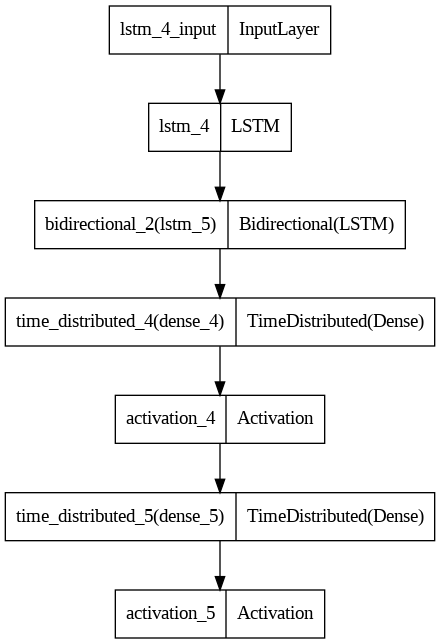

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=42)

In [ ]:
del list_ngrams

In [ ]:
# we have to use data- generation medthod cause this dataset is too large to fit into memory
BATCH_SIZE = 512
def generate_data(data, batch_size):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):
            y.append(encoder_data(data[cur_index]))
            x.append(encoder_data(add_noise(data[cur_index],0.94,0.985)))
            cur_index += 1
            if cur_index > len(data)-1:
                cur_index = 0
        yield np.array(x), np.array(y)

In [ ]:
import os
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)

In [ ]:
model.load_weights(os.path.join('./model', 'spell_ngram_5.h5'))

In [ ]:
import os
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Định nghĩa các callback
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"
    ),
    ModelCheckpoint(
        filepath=os.path.join('./model', 'spell_ngram_5.h5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=4,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=2,
        verbose=1
    )
]

# Huấn luyện mô hình với các callback
model.fit(
    train_generator,
    steps_per_epoch=len(train_data)//BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(valid_data)//BATCH_SIZE,
    callbacks=callbacks
)


Epoch 1/10


KeyboardInterrupt: 

In [ ]:
# Define the filepath for saving the model
#filepath = os.path.join('./model_5ngram', 'spell_{val_acc:.2f}.h5')

# Create a ModelCheckpoint callback
#checkpointer = ModelCheckpoint(filepath=filepath, save_best_only=True, verbose=1)

# Fit the model with the callback
#model.fit(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=10,
#                    validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
#                    callbacks=[checkpointer])

In [ ]:
model.save("model/model_spell_ngram_5.h5")

In [ ]:
from keras.models import load_model

In [ ]:
eval_model = load_model('model/spell_ngram_5.h5')
eval_model.evaluate_generator(test_generator,steps=len(test)//BATCH_SIZE,verbose=1)